# And/Or 연산을 수행하는 퍼셉트론

In [3]:
def perceptron(x1, x2, b):
    z = w1 * x1 + w2 * x2 + b
    if z <= 0:
        return -1
    else:
        return 0

In [4]:
print("AND Gate")
w1 = float(input("Enter the weight for x1: "))
w2 = float(input('Enter the weight for x2: '))
bias = float(input("Enter the bias"))

for xs in [(1, 1), (1, 0), (0, 1), (0, 0)]:
    result = perceptron(xs[0], xs[1], bias)
    print(xs,':', result)

AND Gate
(1, 1) : 0
(1, 0) : 0
(0, 1) : 0
(0, 0) : 0


In [5]:
print("OR Gate")
w1 = float(input("Enter the weight for x1: "))
w2 = float(input('Enter the weight for x2: '))
bias = float(input("Enter the bias"))

for xs in [(1, 1), (1, 0), (0, 1), (0, 0)]:
    result = perceptron(xs[0], xs[1], bias)
    print(xs,':', result)

OR Gate
(1, 1) : 0
(1, 0) : 0
(0, 1) : 0
(0, 0) : 0


# 단층 퍼셉트론 연습

In [6]:
import numpy as np
import pandas as pd

In [7]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

In [9]:
clf = Perceptron(max_iter=1000, eta0=0.1, tol=0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.8

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 2,  9,  7],
       [ 0,  0, 11]])

# 다층 퍼셉트론 연습

#심층 신경망

In [11]:
#Keras 설치

In [12]:
#!pip install --upgrade tensorflow

In [13]:
#!pip install upgrade keras

In [14]:
import keras

In [15]:
keras.__version__

'2.9.0'

### [실습 1] Keras를 활용한 심층신경망 모델 구현(붓꽃 분류)

In [ ]:
#!pip install scikit-learn
#pip install pandas
#pip install matplotlib
#!pip install numpy

In [18]:
#1) 데이터 전처리 및 분할
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, 3)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
#2) 인공 신경망 모형 구성
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=8, input_dim=4, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-02-20 22:02:27.636654: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-20 22:02:27.637121: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [22]:
# 3) 모형의 학습과정 설정
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics='accuracy')

In [23]:
# 4)모델 학습
hist = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=True)

Epoch 1/100


2023-02-20 22:02:27.895500: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-20 22:02:28.092436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 13ms/step - loss: 4.8235 - accuracy: 0.3048
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 4.1389 - accuracy: 0.3048
Epoch 3/100
11/11 [==============================] - 0s 11ms/step - loss: 3.6789 - accuracy: 0.3048
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 3.3326 - accuracy: 0.3048
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 3.0362 - accuracy: 0.3048
Epoch 6/100
11/11 [==============================] - 0s 9ms/step - loss: 2.7839 - accuracy: 0.3048
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 2.5674 - accuracy: 0.3048
Epoch 8/100
11/11 [==============================] - 0s 9ms/step - loss: 2.4024 - accuracy: 0.3048
Epoch 9/100
11/11 [==============================] - 0s 10ms/step - loss: 2.2545 - accuracy: 0.3048
Epoch 10/100
11/11 [==============================] - 0s 9ms/step - loss: 2.1150 - accuracy: 0.3048
Epoch 11/100
11/11

In [24]:
# epoch별 손실함수 값, 평가지표 시각화
import pandas as pd

pd.DataFrame(hist.history)

,loss,accuracy
0,4.823546,0.304762
1,4.138853,0.304762
2,3.678896,0.304762
3,3.332598,0.304762
4,3.036233,0.304762
...,...,...
95,0.274620,0.942857
96,0.270634,0.961905
97,0.266749,0.971429
98,0.264208,0.952381


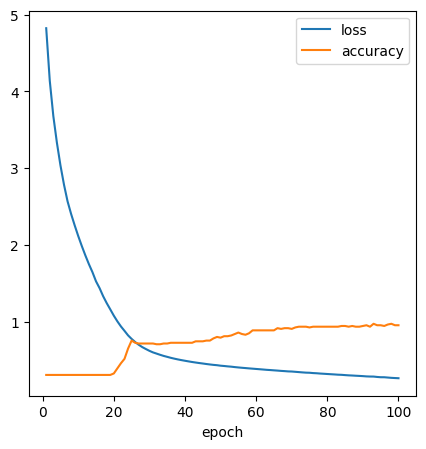

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.plot(range(1, 101), hist.history['loss'], label='loss')
plt.plot(range(1, 101), hist.history['accuracy'], label='accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [26]:
# 5) 모형의 성능평가
loss, acc = model.evaluate(X_test, y_test)

print(f'loss={loss:.3f}')
print(f'accuracy = {acc:.3f}')

2/2 [==============================] - 0s 24ms/step - loss: 0.3096 - accuracy: 0.9333
loss=0.310
accuracy = 0.933


2023-02-20 22:02:39.434647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [27]:
import numpy as np
np.set_printoptions(suppress=True)

In [28]:
y_pred = model.predict(X_test)
y_pred

2/2 [==============================] - 0s 10ms/step


2023-02-20 22:02:39.591756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.00010143, 0.18598962, 0.813909  ],
       [0.01167113, 0.6318953 , 0.35643363],
       [0.9874226 , 0.01254835, 0.00002902],
       [0.00001305, 0.13730992, 0.8626771 ],
       [0.97904223, 0.02084547, 0.00011225],
       [0.00001211, 0.11032507, 0.88966286],
       [0.979924  , 0.01997873, 0.00009732],
       [0.00533418, 0.6543295 , 0.34033635],
       [0.00286194, 0.5757917 , 0.42134637],
       [0.02310174, 0.73553324, 0.241365  ],
       [0.00004684, 0.14861073, 0.8513423 ],
       [0.00926776, 0.69323707, 0.29749516],
       [0.00267622, 0.5056249 , 0.49169898],
       [0.0038607 , 0.58425677, 0.41188255],
       [0.00254292, 0.50553304, 0.4919241 ],
       [0.98076105, 0.01914532, 0.00009363],
       [0.00411941, 0.5529731 , 0.44290748],
       [0.00305341, 0.45805588, 0.5388907 ],
       [0.9721296 , 0.02765239, 0.00021813],
       [0.9847719 , 0.01518304, 0.00004508],
       [0.00029392, 0.24860941, 0.75109667],
       [0.0034002 , 0.50088185, 0.4957179 ],
       [0.

In [29]:
# 클래스 이름을 알기위한 추가 코딩이 필요
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [30]:
y_test_class = np.argmax(y_test, axis=1)
y_test_class


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_class, y_pred_class)

0.9333333333333333

In [32]:
#6)  임의 데이터에 대해 모형의 출력을 확인한다.

